<a href="https://colab.research.google.com/github/olli-turnb/AI-CNN-Workshop/blob/master/CNNWorkshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Intro To CNNs

Hello class and welcome to this introductory workshop on supervised deep learning - more specifically the use of Convolutional Neural Networks (CNNs) for image recognition.

#What is a neural network?

Formally speaking, a neural network is a sequence of successively applied generalised linear models which - theoretically - is capable of approximating any function. 

$$h^{(l)} = g^{(l)}(h^{(l-1)};\beta^{(l)})$$

where $l = \{1,\ldots,n\}$ describes the layer of the n-layer neural network, $h^{(l)}$ is the $l^{\textrm{th}}$ hidden layer- a non linear activation function- and $\beta^{(l)}$ is a vector of a paramaters specifying an element of the function family $g^{(l)}$;   but you're probably more used to seeing them like this:


![alt text](https://cdn-images-1.medium.com/max/1600/1*DW0Ccmj1hZ0OvSXi7Kz5MQ.jpeg)

This represents a series of operations applied to some vector input layer to give some output, depending on a collection of weights (represented by the edges in the graph). Essentially, the network functions as a black box: you put in some array of number, it spits you out an array of numbers, and which numbers it spits out given your input depends on the values of these weights. 



Suppose we wish the black box to mimic the output of some function, such as the relationship between height and life expectancy for example, with this network but don't know what weights we should give the graph to get the right function. We want some process of, starting with some random set of weights and then looking at how wrong the output is from what we would expect, adjusting these weights until we get as close to the true function as possible - which is always possible since neural networks are [universal function approximators](https://en.wikipedia.org/wiki/Universal_approximation_theorem). Luckily such a process exists: we use something called **backpropagation**.

# How backprop works

In order to determine the correct weights to use for the neural network, we need 2 things: 

1.   A **loss function**
2.   A way of minimising the loss function

A **loss function** is just some numerical measure of how inaccurate your network is given its current weights, a kind of 'error' function, and clearly to get the right weights we want the weights that minimise this inaccuracy. The method of doing this is usually some variation on **Gradient Descent** (more information [here](https://en.wikipedia.org/wiki/Gradient_descent)). Formally, gradient descent is a rule foor updating your weights in a way that is supposed to converge to the correct value as follows
$$\beta_{t+1} = \beta_t - \nabla_\beta l|_{\beta = \beta_t} $$ 
But all this means is that you subtract off the direction to move beta in that would increase the loss, here denoted $l$, the most. I.e. if we shift one of the weights up, and the loss goes up too, we want to decrease that weight. We calculate this     $ \nabla_\beta l|_{\beta = \beta_t}$ value (a vector called the **gradient**) by the aforementioned process known as **backpropagation**.


Each node in the above graph represents a function - often called an 'activation function' which combines all the outputs of the nodes in the layer before. At each layer, we multiply the previous layer's output by all its connecting weights and then apply the activation function for this layer. These activation functions can take a few forms:



1.   A ReLU function ($0$ if the input is $<0$, or return the input - there are a few variants of this)
2. A Sigmoid function (for squahing the input to between 0 and 1)

1.   A Sofmax function (this makes all input elements in the previous layer close to 0 except the largest one which it makes close to 1 - good for multi-class prediction output layer)

But an exhaustive list can be found [here](https://en.wikipedia.org/wiki/Activation_function).

we then use rules of [differentiation](https://https://en.wikipedia.org/wiki/Gradient) on each node of the graph to calculate this value going in and out of each computational node something like: 


![alt text](https://leonardoaraujosantos.gitbooks.io/artificial-inteligence/content/Images/MulGate.png)


we keep doing this until the loss decreases to a point where we are satisfied out function is adequately approximated.


The loss functions themselves take a few forms too - can find a list [here](https://towardsdatascience.com/common-loss-functions-in-machine-learning-46af0ffc4d23)-  but for practical purposes you want something called the crossentropy loss for categorical classification problems - categorical crossentropy for multiple categories and binary crossentropy for 1 and 0 output classification.



# What is a Convolutional Neural Network?

A convolutional neural network is a particular flabour of neural network with a slightly modified architecture, intended for dealing with image comprehensions. This architecture consists of two parts: 

1.   Feature extraction
2.   Classification

In the first part, the network does convolution and pooling operations to summarize the image into something called a feature vector, where each component describes a different feature of the image (though its not always clear what these are).

The classification part is then a regular neural network taking the feature vector as input and outputs some vector summarising the image in some way; whether that be a binary classification ( 1 or 0), or a category classification (a vector with one element being one and the rest being 0) or even something more exotic like a word embedding (see the extension task for more info on these).

![alt text](https://adeshpande3.github.io/assets/Cover.png)

CNNs usually take as input a numerical matrix describing the different RGB colour channels for an image, so there usually has to be some preprocessing involved to get the images as an array of numbers ready to be put through, 

![alt text](https://adeshpande3.github.io/assets/Corgi3.png)

luckily for the first two tasks we will have done this for you.  



# Task #1: Cat Classification

For your first task, we have prepared a dataset containing labelled images of cats and dogs (1 for a cat 0 for a dog) and we will walk you through how to build an algorithm to differentiate between the two.

In [0]:

!git clone https://olli-turnz@bitbucket.org/olli-turnz/cnn-workshop-data.git
!unzip cnn-workshop-data/PetImages-20190315T092016Z-001.zip

In [0]:
import tensorflow as tf
from keras import regularizers
from keras.layers import Conv2D, MaxPool2D, Activation, Flatten, Dense, Dropout
from keras.models import Sequential, load_model
import pandas as pd
import os
from skimage import io, transform
import numpy as np

rootCat = 'cnn-workshop-data/PetImages/Cat/'
rootDog = 'cnn-workshop-data/PetImages/Dog/'
 
f = os.listdir(rootCat)
g = os.listdir(rootDog)



data = []
for file in f[:-1000]:
    try:
        myimage = io.imread(rootCat + file).astype( np.float32)/255
        myimage = transform.resize(myimage, (64,64,3))
        data.append((myimage,1))
    except:
        print('whoops, bad cat')
for file in g[:-1000]:
    try: 
        myimage = io.imread(rootDog + file).astype( np.float32)/255
        myimage = transform.resize(myimage, (64,64,3))
        data.append((myimage,0))
    except:
        print('whoops, bad dog')



Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


whoops, bad cat
whoops, bad cat


/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expecting to read 18350080 bytes but only got 0. Skipping tag 0
  "Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:709: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 6. 
  warnings.warn(str(msg))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  "Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expecting to read 65536 bytes but only got 0. Skipping tag 3
  "Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expecting to read 307363840 bytes but only got 0. Skipping tag 5
 

whoops, bad cat
whoops, bad dog


/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  "Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  "Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  "Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  "Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

whoops, bad dog


/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expecting to read 6553600 bytes but only got 0. Skipping tag 49
  "Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1050744 bytes but only got 4951. Skipping tag 51
  "Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expecting to read 293339136 bytes but only got 0. Skipping tag 5
  "Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expecting to read 293863424 bytes but only got 0. Skipping tag 5
  "Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expecting 

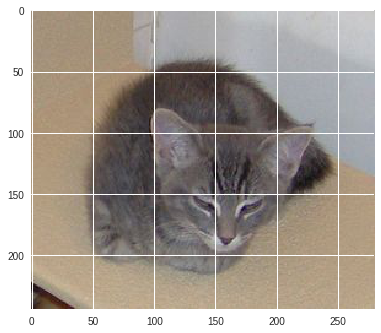

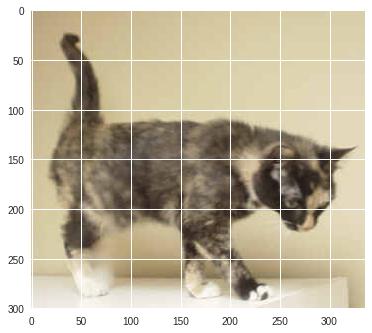

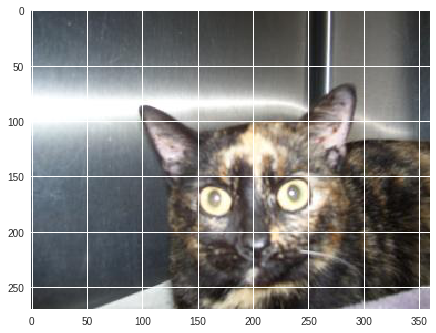

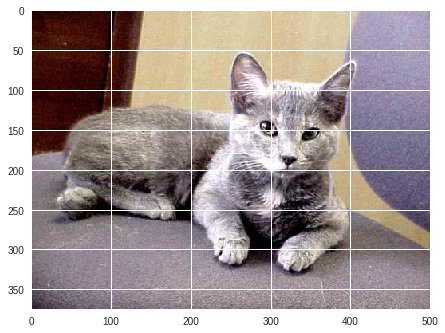

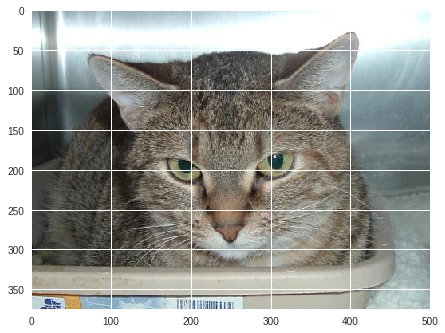

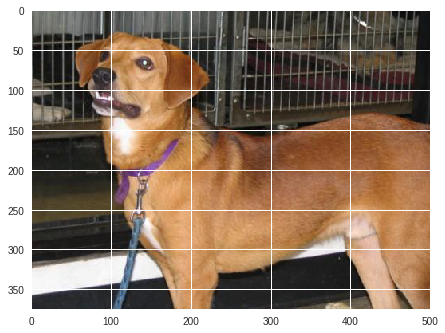

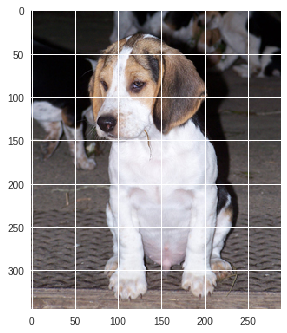

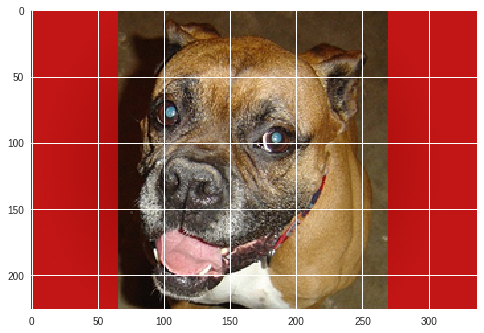

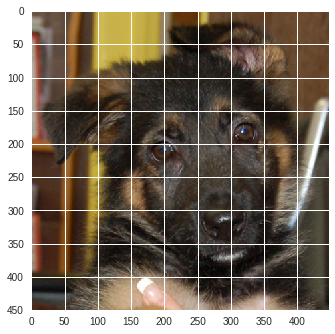

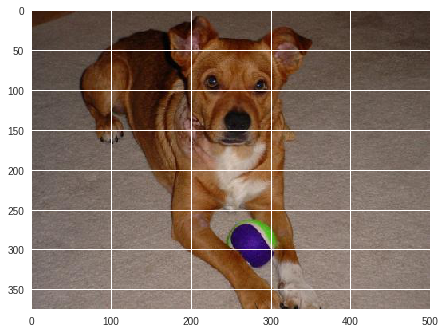

In [0]:
import matplotlib
import matplotlib.pyplot as plt
for i in range(5):
    theimage = io.imread(rootCat + f[i]).astype( np.float32)/255
    plt.imshow(theimage)
    plt.show()
for i in range(5):
    theimage = io.imread(rootDog + g[i]).astype( np.float32)/255
    plt.imshow(theimage)
    plt.show()


**Intro to Keras**

Keras is a pre-put together deep learning package the cuts through a lot of the nasty nitty gritty of programming deep learning models. There are a few different ways to use keras, but we will be using it to make sequential models, where we add layers to the model one at a time.  

In [0]:
import tensorflow as tf
from keras import regularizers
from keras.layers import Conv2D, MaxPool2D, Activation, Flatten, Dense, Dropout
from keras.models import Sequential, load_model
import numpy as np
from random import shuffle 

image_shape = (64,64,3)

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=image_shape))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(rate = 0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

shuffle(data)

X_train = np.array([i[0] for i in data])

y_train = np.array([i[1] for i in data]).reshape((len(data),))

model.fit(X_train, y_train, validation_split = 0.1,  epochs=100)


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 20697 samples, validate on 2300 samples
Epoch 1/100
20697/20697 [==============================] - 15s 729us/step - loss: 0.6378 - acc: 0.6267 - val_loss: 0.5565 - val_acc: 0.7183
Epoch 2/100
20697/20697 [==============================] - 10s 469us/step - loss: 0.5160 - acc: 0.7473 - val_loss: 0.4712 - val_acc: 0.7800
Epoch 3/100
20697/20697 [==============================] - 10s 467us/step - loss: 0.4448 - acc: 0.7938 - val_loss: 0.4639 - val_acc: 0.7813
Epoch 4/100
20697/20697 [==============================] - 10s 466us/step - loss: 0.3948 - acc: 0.8275 - val_loss: 0.3927 - val_acc: 0.8217
Epoch 5/100
20697/20697 [==============================] - 10s 467us/step - loss: 0.3641 - acc: 0.8393 - val_loss: 0.3906 - val_acc: 0.8222
Epoch 6/100
2069

# Task #2: MNist character classification

MNist is a data set of greyscale handwritten decimal digits, each labelled with the digit they are meant to represent. Your task, based on above information, is to train a convolutional neural network to classify each element into the digit it represents. Here are a few examples of images from this dataset:

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Label: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Digit in the image 8


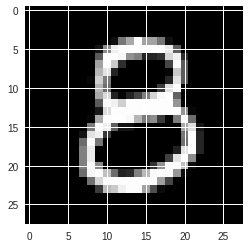

Label: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Digit in the image 6


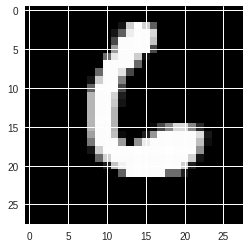

Label: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Digit in the image 6


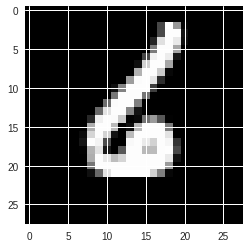

Label: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Digit in the image 0


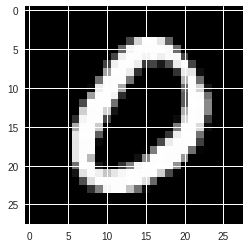

Label: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Digit in the image 8


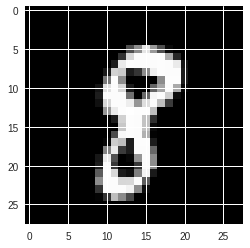

Label: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Digit in the image 1


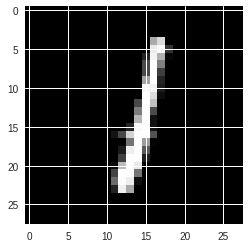

Label: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Digit in the image 5


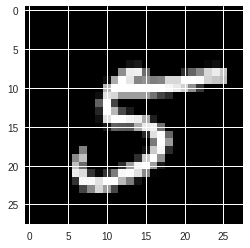

Label: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Digit in the image 0


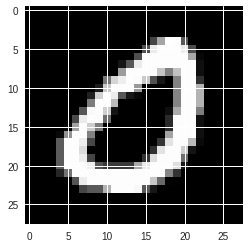

Label: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Digit in the image 6


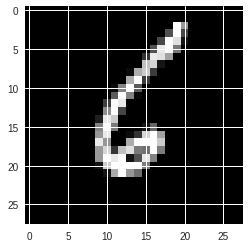

Label: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
Digit in the image 3


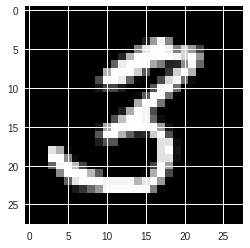

In [0]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

image_count = 10
data = mnist.train.next_batch(image_count)

images = data[0]
labels = data[1]

# import matplotlib for visualization
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

for index, image in enumerate(images):
    print('Label:', labels[index])
    print('Digit in the image', np.argmax(labels[index]))
    plt.imshow(image.reshape(28,28),cmap='gray')
    plt.show()

Your next task is to build a model that will input one of these images and output the digit that it represents. We've prepared the data for you below:

In [0]:
import numpy as np

import tensorflow as tf
mnist = tf.keras.datasets.mnist

train = 0
test = 1

image_size = (28,28,1)
training_data = mnist.load_data()[train]
testing_data = mnist.load_data()[test]

X_train_mnist = training_data[0]
y_train_mnist = training_data[1]


array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

# Extension task: push it to the limit

In [0]:
from IPython.display import HTML

# Youtube
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/vT8OU5WtfkQ" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')


Your extension task (should you choose to accept it) will use data from https://visualqa.org/ -  a data set of images and then questions about those images. For this however, you will have to be in charge of pulling in the data, deciding what you want to do with it, and deciding what kind of machine learning model will be required to perform your task.

